In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime



In [2]:
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-10.519686618621492 -142.0297371987859
-27.695278903654952 -24.844295194182138
67.69084232078083 90.12697775728242
76.94142539603718 -58.970215471879214
-16.424397188498887 -68.46936187316375
81.33926417433318 -0.8689044133943753
-10.092800267452915 143.31012437764804
67.59094366000028 -117.36999919049023
-29.481038758684136 108.76373301223379
-8.869542871106077 154.86214173072472
46.63894003801309 -24.47323542814189
-30.011031269348138 163.49990799284103
71.4421593587339 -28.983513105559695
57.68765325864808 127.8813803725028
14.188009707310272 -19.582673933235156
-23.297807133509735 123.13859157825607
15.778145439756145 18.158932859722597
47.31398660521822 -11.501249463369078
1.7165281221142266 33.6835836153474
-55.01879706230762 1.1030217839063994
36.23802724679439 52.45682794895987
-58.45047083494198 22.879851515094117
-68.05023793679746 8.19881776358676
6.248883567403624 166.29843126696733
-89.69201047229767 13.849581338976606
-69.08684173413121 -148.6374627281807
65.0472622472673

-36.99136782494851 173.82530232576778
-68.73964480324639 -139.48452725401384
-4.8057179412382425 -37.20640760267088
7.611598667487328 93.01849493124462
11.629485151322243 120.81179546134575
-84.75439225245219 57.14553353318291
70.21418455013605 112.55943726516853
63.052187069290994 -93.0377542137271
49.84236441410479 121.17142195426288
-54.603023874790885 -30.3106274985023
-70.38021678141224 -69.8150633821551
11.947430382730104 -15.438502402972631
-75.67194361122054 82.60025856750542
-34.520240920871224 -115.14709440824961
87.88421769927444 -33.159953368729475
-35.48394176229341 29.50310204584497
-60.981459596807255 -35.29896883925716
-60.55760116024564 -149.47021229206945
11.571975363481442 108.49576964262565
27.031869110754414 1.9430809070848056
-62.02493343892847 -148.115988182723
-34.053564332135146 152.92921342402008
15.150613926862704 52.520192507666195
8.788641459949616 -17.020563852348772
85.21944287008523 106.65103559472777
52.93014877137736 97.25106022942055
28.71298426300373

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | vila velha
Processing Record 3 of Set 1 | svetlogorsk
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | la paz
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | daru
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | gizo
Processing Record 11 of Set 1 | praia da vitoria
Processing Record 12 of Set 1 | noumea
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | tommot
Processing Record 15 of Set 1 | dakar
Processing Record 16 of Set 1 | broome
Processing Record 17 of Set 1 | faya
Processing Record 18 of Set 1 | skibbereen
Processing Record 19 of Set 1 | soroti
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | amol
Processing Record 22 of Set 1 |

Processing Record 35 of Set 4 | iracoubo
Processing Record 36 of Set 4 | saskylakh
Processing Record 37 of Set 4 | sfantu gheorghe
Processing Record 38 of Set 4 | saint george
Processing Record 39 of Set 4 | nanortalik
Processing Record 40 of Set 4 | ondorhaan
City not found. Skipping...
Processing Record 41 of Set 4 | atambua
Processing Record 42 of Set 4 | port augusta
Processing Record 43 of Set 4 | nizhniy tsasuchey
Processing Record 44 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 4 | belyy yar
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | karlskrona
Processing Record 48 of Set 4 | rodna
Processing Record 49 of Set 4 | halalo
City not found. Skipping...
Processing Record 50 of Set 4 | khatanga
Processing Record 1 of Set 5 | westport
Processing Record 2 of Set 5 | arcachon
Processing Record 3 of Set 5 | taltal
Processing Record 4 of Set 5 | thiruvananthapuram
Processing Record 5 of Set 5 | eureka
Processing Record 6 of Set 5

Processing Record 24 of Set 8 | la palma
Processing Record 25 of Set 8 | manzhouli
Processing Record 26 of Set 8 | sechura
Processing Record 27 of Set 8 | burns lake
Processing Record 28 of Set 8 | lichinga
Processing Record 29 of Set 8 | annigeri
Processing Record 30 of Set 8 | thinadhoo
Processing Record 31 of Set 8 | marrakesh
Processing Record 32 of Set 8 | tikalaan
City not found. Skipping...
Processing Record 33 of Set 8 | lianzhou
Processing Record 34 of Set 8 | camana
Processing Record 35 of Set 8 | saravan
Processing Record 36 of Set 8 | saint-philippe
Processing Record 37 of Set 8 | navirai
Processing Record 38 of Set 8 | tarija
Processing Record 39 of Set 8 | guapi
Processing Record 40 of Set 8 | kruisfontein
Processing Record 41 of Set 8 | maputo
Processing Record 42 of Set 8 | libreville
Processing Record 43 of Set 8 | abnub
Processing Record 44 of Set 8 | te anau
Processing Record 45 of Set 8 | henties bay
Processing Record 46 of Set 8 | sulina
Processing Record 47 of Set

Processing Record 9 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 10 of Set 12 | huancavelica
Processing Record 11 of Set 12 | shimoda
Processing Record 12 of Set 12 | hays
Processing Record 13 of Set 12 | gwanda
Processing Record 14 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 12 | asyut
Processing Record 16 of Set 12 | acapulco
Processing Record 17 of Set 12 | baoqing
Processing Record 18 of Set 12 | necochea
Processing Record 19 of Set 12 | chapada dos guimaraes
Processing Record 20 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 21 of Set 12 | kuche
City not found. Skipping...
Processing Record 22 of Set 12 | sherwood
Processing Record 23 of Set 12 | asau
Processing Record 24 of Set 12 | ancud
Processing Record 25 of Set 12 | fortuna
Processing Record 26 of Set 12 | grootfontein
Processing Record 27 of Set 12 | placetas
Processing Record 28 of Set 12 | turayf
Processing Record 29 of Set 12 | rognan
P

In [8]:
len(city_data)

561

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,298.58,67,0,5.05,PF,2022-07-26 04:29:36
1,Vila Velha,-20.3297,-40.2925,292.56,94,40,0.00,BR,2022-07-26 04:29:37
2,Svetlogorsk,52.6333,29.7333,288.00,91,1,2.07,BY,2022-07-26 04:29:37
3,Upernavik,72.7868,-56.1549,276.29,90,73,4.27,GL,2022-07-26 04:29:38
4,La Paz,-16.5000,-68.1500,273.14,100,20,2.57,BO,2022-07-26 04:27:10
5,Daru,-9.0763,143.2092,299.00,82,89,6.82,PG,2022-07-26 04:29:39
6,Yellowknife,62.4560,-114.3525,291.44,55,20,4.12,CA,2022-07-26 04:29:39
7,Geraldton,-28.7667,114.6000,292.38,52,28,1.54,AU,2022-07-26 04:29:40
8,Gizo,-8.1030,156.8419,302.24,69,28,2.62,SB,2022-07-26 04:29:40
9,Praia Da Vitoria,38.7333,-27.0667,296.35,94,40,1.42,PT,2022-07-26 04:29:41


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-07-26 04:29:36,-9.8000,-139.0333,298.58,67,0,5.05
1,Vila Velha,BR,2022-07-26 04:29:37,-20.3297,-40.2925,292.56,94,40,0.00
2,Svetlogorsk,BY,2022-07-26 04:29:37,52.6333,29.7333,288.00,91,1,2.07
3,Upernavik,GL,2022-07-26 04:29:38,72.7868,-56.1549,276.29,90,73,4.27
4,La Paz,BO,2022-07-26 04:27:10,-16.5000,-68.1500,273.14,100,20,2.57
5,Daru,PG,2022-07-26 04:29:39,-9.0763,143.2092,299.00,82,89,6.82
6,Yellowknife,CA,2022-07-26 04:29:39,62.4560,-114.3525,291.44,55,20,4.12
7,Geraldton,AU,2022-07-26 04:29:40,-28.7667,114.6000,292.38,52,28,1.54
8,Gizo,SB,2022-07-26 04:29:40,-8.1030,156.8419,302.24,69,28,2.62
9,Praia Da Vitoria,PT,2022-07-26 04:29:41,38.7333,-27.0667,296.35,94,40,1.42


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

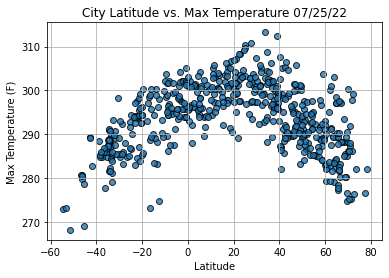

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

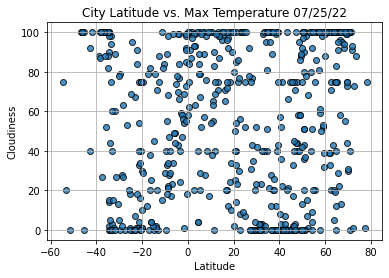

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

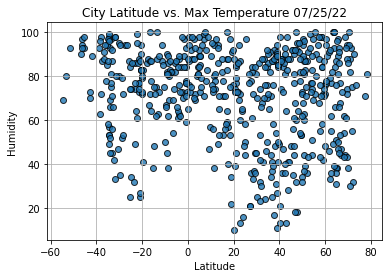

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


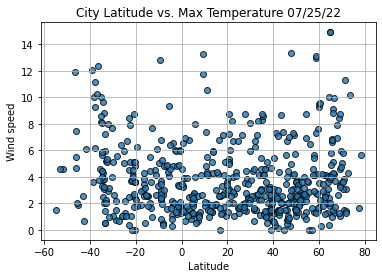

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

NameError: name 'x_values' is not defined